
# House Price Prediction in King County Using Keras

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [1]:
# Load some standard Python libraries

from __future__ import print_function
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Keras libraries used in this example

import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model

Using TensorFlow backend.


# Load data

In [3]:
kc_data_org = pd.read_csv("kc_house_data.csv")

In [4]:
kc_data_org

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
kc_data_org.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Transform dates into year, month and day and select columns

In [ ]:
# Waterfront, view and yr_renovated are not taken as features

In [8]:
kc_data_org['sale_yr'] = pd.to_numeric(kc_data_org.date.str.slice(0, 4))
kc_data_org['sale_month'] = pd.to_numeric(kc_data_org.date.str.slice(4, 6))
kc_data_org['sale_day'] = pd.to_numeric(kc_data_org.date.str.slice(6, 8))

kc_data = pd.DataFrame(kc_data_org, columns=[
        'sale_yr','sale_month','sale_day',
        'bedrooms','bathrooms','sqft_living','sqft_lot','floors',
        'condition','grade','sqft_above','sqft_basement','yr_built',
        'zipcode','lat','long','sqft_living15','sqft_lot15','price'])
label_col = 'price'

In [9]:
kc_data.describe()

,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,2014.322954,6.574423,15.688197,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,7.656873,1788.390691,291.509045,1971.005136,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.400881e+05
std,0.467616,3.115308,8.635063,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.650743,1.175459,828.090978,442.575043,29.373411,53.505026,0.138564,0.140828,685.391304,27304.179631,3.671272e+05
min,2014.000000,1.000000,1.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,2014.000000,4.000000,8.000000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,2014.000000,6.000000,16.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,2015.000000,9.000000,23.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,2015.000000,12.000000,31.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


# Split data for training and validation

In [16]:
def train_validate_test_split(df, train_part=.6, validate_part=.2, test_part=.2, seed=None):
    np.random.seed(seed)
    total_size = train_part + validate_part + test_part
    train_percent = train_part / total_size
    validate_percent = validate_part / total_size
    test_percent = test_part / total_size
    perm = np.random.permutation(df.index)
    m = len(df)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = perm[:train_end]
    validate = perm[train_end:validate_end]
    test = perm[validate_end:]
    return train, validate, test

In [46]:
train_size, valid_size, test_size = (70, 30, 0)
kc_train, kc_valid, kc_test = train_validate_test_split(kc_data, 
                              train_part=train_size, 
                              validate_part=valid_size,
                              test_part=test_size,
                              seed=2017)

Extract data for training and validation into x and y vectors

In [47]:
kc_y_train = kc_data.loc[kc_train, [label_col]]
kc_x_train = kc_data.loc[kc_train, :].drop(label_col, axis=1)
kc_y_valid = kc_data.loc[kc_valid, [label_col]]
kc_x_valid = kc_data.loc[kc_valid, :].drop(label_col, axis=1)

print('Size of training set: ', len(kc_x_train))
print('Size of validation set: ', len(kc_x_valid))
print('Size of test set: ', len(kc_test), '(not converted)')

Size of training set:  12967
Size of validation set:  8645
Size of test set:  1 (not converted)


# Prepare data for training and validation of the Keras model

In [21]:
# Function to get statistics about a data frame

def norm_stats(df1, df2):
    dfs = df1.append(df2)
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)

In [22]:
# Function to Z-normalise the entire data frame - note stats for Z transform passed in

def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

Normalise training and validation predictors using the stats from training data only (to ensure the same transformation applies to both training and validation data), and then convert them into numpy arrays to be used by Keras.



In [48]:
stats = norm_stats(kc_x_train, kc_x_valid)
arr_x_train = np.array(z_score(kc_x_train, stats))
arr_y_train = np.array(kc_y_train)
arr_x_valid = np.array(z_score(kc_x_valid, stats))
arr_y_valid = np.array(kc_y_valid)

print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (12967, 18)
Training samples:  12967
Validation samples:  8645


# Create Keras model

### Three functions to define alternative Keras models

The first is very simple, consisting of three layers and Adam optimizer.

In [50]:
def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(y_size))
#     print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)

The second with Adam optimizer consists of 4 layers and the first uses 10% dropouts

In [12]:
def basic_model_2(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(20, activation="relu"))
    t_model.add(Dense(y_size))
#     print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)

The third is the most complex, it extends the previous model with Nadam optimizer, dropouts and L1/L2 regularisers.

In [13]:
def basic_model_3(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(80, activation="tanh", kernel_initializer='normal', input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(120, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(20, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1_l2(0.01), bias_regularizer=regularizers.l1_l2(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(10, activation="relu", kernel_initializer='normal'))
    t_model.add(Dropout(0.0))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer='nadam',
        metrics=[metrics.mae])
    return(t_model)

Now we create the model - use one of the above functions.

In [52]:
model1 = basic_model_1(arr_x_train.shape[1], arr_y_train.shape[1])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               1900      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 7,001
Trainable params: 7,001
Non-trainable params: 0
_________________________________________________________________


In [36]:
model2 = basic_model_2(arr_x_train.shape[1], arr_y_train.shape[1])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 100)               1900      
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_35 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 21        
Total params: 7,991
Trainable params: 7,991
Non-trainable params: 0
_________________________________________________________________


In [38]:
model3 = basic_model_3(arr_x_train.shape[1], arr_y_train.shape[1])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 80)                1520      
_________________________________________________________________
dropout_12 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 120)               9720      
_________________________________________________________________
dropout_13 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 20)                2420      
_________________________________________________________________
dropout_14 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                210       
__________

# Fit/Train Keras model

Define how many epochs of training should be done and what is the batch size.

Specify Keras callbacks which allow additional functionality while the model is being fitted.

ModelCheckpoint allows to save the models as they are being built or improved. <br>
TensorBoard interacts with TensorFlow interactive reporting system. <br>
EarlyStopping watches one of the model measurements and stops fitting when no improvement. <br>

In [56]:
epochs = 500
batch_size = 128

keras_callbacks = [
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=2)
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}.hdf5', monitor='val_loss', save_best_only=True, verbose=0)
#     TensorBoard(log_dir='/tmp/keras_logs/model_3', histogram_freq=0, write_graph=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None),
    EarlyStopping(monitor='val_mean_absolute_error', patience=20, verbose=0)
]

Fit the model and record the history of training and validation.
As we specified EarlyStopping with patience=20, with luck the training will stop in less than 200 epochs.
Be patient, the fitting process takes time, use verbose=2 for visual feedback.

In [57]:
history1 = model1.fit(arr_x_train, arr_y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2, # Change it to 2, if wished to observe execution
    validation_data=(arr_x_valid, arr_y_valid),
    callbacks=keras_callbacks)

Train on 12967 samples, validate on 8645 samples
Epoch 1/500
 - 0s - loss: 21649222249.3851 - mean_absolute_error: 74331.5235 - val_loss: 28469586178.4578 - val_mean_absolute_error: 82156.3663
Epoch 2/500
 - 0s - loss: 21622255072.0568 - mean_absolute_error: 74471.8532 - val_loss: 28437902060.3669 - val_mean_absolute_error: 82092.1353
Epoch 3/500
 - 0s - loss: 21604555071.2745 - mean_absolute_error: 74602.5213 - val_loss: 28393957214.6711 - val_mean_absolute_error: 81889.2368
Epoch 4/500
 - 0s - loss: 21568773968.3714 - mean_absolute_error: 74423.7611 - val_loss: 28386045693.3053 - val_mean_absolute_error: 82006.9533
Epoch 5/500
 - 0s - loss: 21548792208.4158 - mean_absolute_error: 74404.9678 - val_loss: 28353582009.0485 - val_mean_absolute_error: 81963.7884
Epoch 6/500
 - 0s - loss: 21503879477.4033 - mean_absolute_error: 74375.1837 - val_loss: 28349199352.3008 - val_mean_absolute_error: 81845.3091
Epoch 7/500
 - 0s - loss: 21486691118.9672 - mean_absolute_error: 74422.2058 - val_loss

Epoch 58/500
 - 0s - loss: 20234332113.2499 - mean_absolute_error: 73387.1295 - val_loss: 27601590367.9445 - val_mean_absolute_error: 81965.8683
Epoch 59/500
 - 0s - loss: 20207244514.4851 - mean_absolute_error: 73299.0408 - val_loss: 27595574194.8891 - val_mean_absolute_error: 82071.7669
Epoch 60/500
 - 0s - loss: 20191420121.2851 - mean_absolute_error: 73372.7794 - val_loss: 27606327416.3452 - val_mean_absolute_error: 82142.2559
Epoch 61/500
 - 0s - loss: 20170524938.8386 - mean_absolute_error: 73271.8112 - val_loss: 27600801613.6143 - val_mean_absolute_error: 82130.5243
Epoch 62/500
 - 0s - loss: 20154460636.2662 - mean_absolute_error: 73389.7942 - val_loss: 27557472930.4541 - val_mean_absolute_error: 82034.0009
Epoch 63/500
 - 0s - loss: 20128477277.8555 - mean_absolute_error: 73319.8716 - val_loss: 27528924293.0193 - val_mean_absolute_error: 81903.9252
Epoch 64/500
 - 0s - loss: 20115183791.7865 - mean_absolute_error: 73262.9650 - val_loss: 27531428967.4068 - val_mean_absolute_err

In [50]:
history2 = model2.fit(arr_x_train, arr_y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2, # Change it to 2, if wished to observe execution
    validation_data=(arr_x_valid, arr_y_valid),
    callbacks=keras_callbacks)

Train on 15129 samples, validate on 6483 samples
Epoch 1/500
 - 0s - loss: 419689302637.4798 - mean_absolute_error: 536229.6357 - val_loss: 442033852148.7459 - val_mean_absolute_error: 548900.0350
Epoch 2/500
 - 0s - loss: 418659720692.3921 - mean_absolute_error: 535392.3952 - val_loss: 439585586555.5577 - val_mean_absolute_error: 546916.9116
Epoch 3/500
 - 0s - loss: 414139072595.3875 - mean_absolute_error: 531602.2052 - val_loss: 432193787271.8778 - val_mean_absolute_error: 540777.1926
Epoch 4/500
 - 0s - loss: 403841662773.4877 - mean_absolute_error: 522755.7961 - val_loss: 417896382800.1209 - val_mean_absolute_error: 528625.7041
Epoch 5/500
 - 0s - loss: 386248312498.3150 - mean_absolute_error: 507154.4587 - val_loss: 395428457325.2629 - val_mean_absolute_error: 508762.5755
Epoch 6/500
 - 0s - loss: 360485345563.3276 - mean_absolute_error: 483194.7735 - val_loss: 364650111326.0207 - val_mean_absolute_error: 479978.6569
Epoch 7/500
 - 0s - loss: 327284161269.1197 - mean_absolute_err

 - 0s - loss: 63914533132.0309 - mean_absolute_error: 154166.1604 - val_loss: 70624685609.3043 - val_mean_absolute_error: 155061.7323
Epoch 57/500
 - 0s - loss: 62129385638.0980 - mean_absolute_error: 151275.1926 - val_loss: 68861303520.3702 - val_mean_absolute_error: 152071.7206
Epoch 58/500
 - 0s - loss: 60573359156.0494 - mean_absolute_error: 148665.3419 - val_loss: 67039702866.2533 - val_mean_absolute_error: 148684.1779
Epoch 59/500
 - 0s - loss: 59055208069.1017 - mean_absolute_error: 145871.2632 - val_loss: 65311468795.3009 - val_mean_absolute_error: 145149.0033
Epoch 60/500
 - 0s - loss: 56992131433.1649 - mean_absolute_error: 142242.0964 - val_loss: 63626899438.9412 - val_mean_absolute_error: 142564.2617
Epoch 61/500
 - 0s - loss: 55319736242.8396 - mean_absolute_error: 138821.3265 - val_loss: 62130271582.1786 - val_mean_absolute_error: 140176.8474
Epoch 62/500
 - 0s - loss: 54049437239.5352 - mean_absolute_error: 136770.2169 - val_loss: 60694545727.2201 - val_mean_absolute_err

Epoch 112/500
 - 0s - loss: 30750515490.4345 - mean_absolute_error: 101609.6299 - val_loss: 36100033295.1239 - val_mean_absolute_error: 97400.7477
Epoch 113/500
 - 0s - loss: 30562981337.1829 - mean_absolute_error: 100386.6360 - val_loss: 36038497026.1718 - val_mean_absolute_error: 97552.1720
Epoch 114/500
 - 0s - loss: 30086535906.0327 - mean_absolute_error: 100430.5768 - val_loss: 35751788809.3586 - val_mean_absolute_error: 96810.7886
Epoch 115/500
 - 0s - loss: 30575238245.8653 - mean_absolute_error: 101040.3990 - val_loss: 35630765407.4422 - val_mean_absolute_error: 97047.3429
Epoch 116/500
 - 0s - loss: 30093601872.7477 - mean_absolute_error: 101020.1843 - val_loss: 35425587255.5990 - val_mean_absolute_error: 96592.1469
Epoch 117/500
 - 0s - loss: 29678937987.8665 - mean_absolute_error: 99678.5539 - val_loss: 35246425506.4137 - val_mean_absolute_error: 95570.1593
Epoch 118/500
 - 0s - loss: 29721621664.2094 - mean_absolute_error: 99353.3996 - val_loss: 35063455153.2611 - val_mean_

 - 0s - loss: 23514943062.8732 - mean_absolute_error: 88745.3785 - val_loss: 29178727502.5019 - val_mean_absolute_error: 86886.4025
Epoch 169/500
 - 0s - loss: 23512495421.2376 - mean_absolute_error: 89031.9560 - val_loss: 29120502654.9536 - val_mean_absolute_error: 86428.9271
Epoch 170/500
 - 0s - loss: 23136305445.4803 - mean_absolute_error: 88219.9280 - val_loss: 29078588873.9016 - val_mean_absolute_error: 86520.3074
Epoch 171/500
 - 0s - loss: 23450856493.4164 - mean_absolute_error: 88478.1282 - val_loss: 28949556121.8053 - val_mean_absolute_error: 86220.2454
Epoch 172/500
 - 0s - loss: 23286975229.0388 - mean_absolute_error: 87970.3410 - val_loss: 28883814288.1703 - val_mean_absolute_error: 86119.3104
Epoch 173/500
 - 0s - loss: 23189264317.3984 - mean_absolute_error: 87888.0801 - val_loss: 28774465983.9506 - val_mean_absolute_error: 86168.9043
Epoch 174/500
 - 0s - loss: 23435084084.0325 - mean_absolute_error: 88407.0728 - val_loss: 28670469698.2607 - val_mean_absolute_error: 859

Epoch 225/500
 - 0s - loss: 20510896493.3614 - mean_absolute_error: 83565.2310 - val_loss: 25935110941.0236 - val_mean_absolute_error: 82949.4537
Epoch 226/500
 - 0s - loss: 20270987526.6839 - mean_absolute_error: 83777.4202 - val_loss: 26045690581.9454 - val_mean_absolute_error: 82379.9679
Epoch 227/500
 - 0s - loss: 19295307947.8850 - mean_absolute_error: 82291.6892 - val_loss: 25973918016.6417 - val_mean_absolute_error: 82941.8842
Epoch 228/500
 - 0s - loss: 20221068736.6811 - mean_absolute_error: 83287.9646 - val_loss: 25943429268.7904 - val_mean_absolute_error: 82445.7065
Epoch 229/500
 - 0s - loss: 19893775727.5950 - mean_absolute_error: 82725.4036 - val_loss: 25867039827.5564 - val_mean_absolute_error: 82448.1795
Epoch 230/500
 - 0s - loss: 19392785734.7135 - mean_absolute_error: 82338.3947 - val_loss: 25829702052.1512 - val_mean_absolute_error: 82879.4666
Epoch 231/500
 - 0s - loss: 20056451758.6262 - mean_absolute_error: 83349.4359 - val_loss: 25810512151.5743 - val_mean_absol

Epoch 282/500
 - 0s - loss: 18333670855.9910 - mean_absolute_error: 81260.4411 - val_loss: 24622892370.4902 - val_mean_absolute_error: 80566.5028
Epoch 283/500
 - 0s - loss: 18329207482.1664 - mean_absolute_error: 80766.4016 - val_loss: 24631433349.6270 - val_mean_absolute_error: 80587.9311
Epoch 284/500
 - 0s - loss: 18078499310.3682 - mean_absolute_error: 80720.0617 - val_loss: 24517586984.4356 - val_mean_absolute_error: 80920.3357
Epoch 285/500
 - 0s - loss: 17929876892.2668 - mean_absolute_error: 80288.9370 - val_loss: 24557661477.9479 - val_mean_absolute_error: 80554.2805
Epoch 286/500
 - 0s - loss: 17884653933.7675 - mean_absolute_error: 81253.2771 - val_loss: 24436470792.0555 - val_mean_absolute_error: 80648.2443
Epoch 287/500
 - 0s - loss: 17728524773.4338 - mean_absolute_error: 80159.4925 - val_loss: 24526304613.7603 - val_mean_absolute_error: 80417.4281
Epoch 288/500
 - 0s - loss: 18050125441.9882 - mean_absolute_error: 80635.8657 - val_loss: 24593766268.2684 - val_mean_absol

Epoch 339/500
 - 0s - loss: 16607999533.9240 - mean_absolute_error: 78558.2320 - val_loss: 23562165981.6850 - val_mean_absolute_error: 79675.2675
Epoch 340/500
 - 0s - loss: 16574605920.3490 - mean_absolute_error: 79106.0842 - val_loss: 23513694907.0936 - val_mean_absolute_error: 79542.0438
Epoch 341/500
 - 0s - loss: 16458287502.0530 - mean_absolute_error: 78975.1185 - val_loss: 23573305657.6918 - val_mean_absolute_error: 80278.3053
Epoch 342/500
 - 0s - loss: 16809472016.1089 - mean_absolute_error: 79504.6451 - val_loss: 23538615936.1777 - val_mean_absolute_error: 79388.7869
Epoch 343/500
 - 0s - loss: 16771300040.8032 - mean_absolute_error: 79355.3848 - val_loss: 23601992870.9548 - val_mean_absolute_error: 79360.0270
Epoch 344/500
 - 0s - loss: 16830841212.5904 - mean_absolute_error: 79248.5265 - val_loss: 23534240710.3477 - val_mean_absolute_error: 79386.7797
Epoch 345/500
 - 0s - loss: 16648312426.5694 - mean_absolute_error: 78572.2969 - val_loss: 23593122305.0267 - val_mean_absol

Epoch 396/500
 - 0s - loss: 15607637855.0461 - mean_absolute_error: 77822.8492 - val_loss: 22896421456.0025 - val_mean_absolute_error: 79002.1967
Epoch 397/500
 - 0s - loss: 15788948757.0330 - mean_absolute_error: 77568.1792 - val_loss: 22966044745.2895 - val_mean_absolute_error: 78707.0621
Epoch 398/500
 - 0s - loss: 15952394045.5422 - mean_absolute_error: 77511.5603 - val_loss: 22919842017.2389 - val_mean_absolute_error: 78993.1185
Epoch 399/500
 - 0s - loss: 15481201685.1853 - mean_absolute_error: 77056.3955 - val_loss: 22904187115.6637 - val_mean_absolute_error: 78841.5049
Epoch 400/500
 - 0s - loss: 15641325697.5483 - mean_absolute_error: 77468.0198 - val_loss: 22899034466.6013 - val_mean_absolute_error: 78888.8882
Epoch 401/500
 - 0s - loss: 15522105347.5873 - mean_absolute_error: 77184.8508 - val_loss: 22854561639.7347 - val_mean_absolute_error: 78959.4196
Epoch 402/500
 - 0s - loss: 16021172425.9708 - mean_absolute_error: 77724.1557 - val_loss: 22865241766.7179 - val_mean_absol

Epoch 453/500
 - 0s - loss: 15127738070.2555 - mean_absolute_error: 76425.3826 - val_loss: 22488776528.0420 - val_mean_absolute_error: 78308.3966
Epoch 454/500
 - 0s - loss: 15505319328.2602 - mean_absolute_error: 76875.4191 - val_loss: 22523752777.4870 - val_mean_absolute_error: 78241.4010
Epoch 455/500
 - 0s - loss: 15344888992.1417 - mean_absolute_error: 77012.4418 - val_loss: 22641492100.0475 - val_mean_absolute_error: 78297.4814
Epoch 456/500
 - 0s - loss: 15222713485.2577 - mean_absolute_error: 76159.4315 - val_loss: 22575666251.0270 - val_mean_absolute_error: 78475.7774
Epoch 457/500
 - 0s - loss: 15139244065.0978 - mean_absolute_error: 76362.1105 - val_loss: 22436809027.6428 - val_mean_absolute_error: 78470.9029
Epoch 458/500
 - 0s - loss: 15247374475.5656 - mean_absolute_error: 76472.9793 - val_loss: 22594822278.1009 - val_mean_absolute_error: 78019.1154
Epoch 459/500
 - 0s - loss: 14671220028.0193 - mean_absolute_error: 75825.3247 - val_loss: 22541919738.7086 - val_mean_absol

In [49]:
history3 = model3.fit(arr_x_train, arr_y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2, # Change it to 2, if wished to observe execution
    validation_data=(arr_x_valid, arr_y_valid),
    callbacks=keras_callbacks)

Train on 15129 samples, validate on 6483 samples
Epoch 1/500
 - 0s - loss: 18577503690.5630 - mean_absolute_error: 85651.1955 - val_loss: 21683427253.9207 - val_mean_absolute_error: 77593.1156
Epoch 2/500
 - 0s - loss: 19285267603.7554 - mean_absolute_error: 86747.8285 - val_loss: 22266572418.8629 - val_mean_absolute_error: 78276.4639
Epoch 3/500
 - 0s - loss: 18679680412.5375 - mean_absolute_error: 85222.0122 - val_loss: 21500254826.6963 - val_mean_absolute_error: 77144.4529
Epoch 4/500
 - 0s - loss: 19450328951.3448 - mean_absolute_error: 86759.1221 - val_loss: 22225198076.0512 - val_mean_absolute_error: 77034.9790
Epoch 5/500
 - 0s - loss: 19317629377.0872 - mean_absolute_error: 86253.3139 - val_loss: 21442117043.1566 - val_mean_absolute_error: 76983.6083
Epoch 6/500
 - 0s - loss: 18544875055.6161 - mean_absolute_error: 86109.1246 - val_loss: 21639024364.0586 - val_mean_absolute_error: 77210.4605
Epoch 7/500
 - 0s - loss: 19487708689.6995 - mean_absolute_error: 86436.2254 - val_loss

# Evaluate and report performance of the trained model

In [39]:
train_score = model1.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model1.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train MAE:  72793.1825 , Train Loss:  19672834061.1985
Val MAE:  82285.8638 , Val Loss:  29186219026.9542


In [52]:
train_score = model2.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model2.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train MAE:  66756.7723 , Train Loss:  12182144364.0077
Val MAE:  77605.3994 , Val Loss:  22335134767.2275


In [45]:
train_score = model3.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model3.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train MAE:  67277.9973 , Train Loss:  12350654217.0528
Val MAE:  78312.7426 , Val Loss:  21730399328.8243


This function allows plotting of the training history

In [41]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_absolute_error'])
    plt.plot(h['val_mean_absolute_error'])
    plt.title('Training vs Validation MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()
    
    return

Now plot the training history, i.e. the Mean Absolute Error and Loss (Mean Squared Error), which were both defined at the time of model compilation. Note that the plot shows validation error as less than training error, which is quite deceptive. The reason for this is that training error is calculated for the entire epoch (and at its begining it was much worse than at the end), whereas the validation error is taken from the last batch (after the model improved). See the above evaluation statistics to confirm that the evaluation puts these errors in the correct order at the very end.



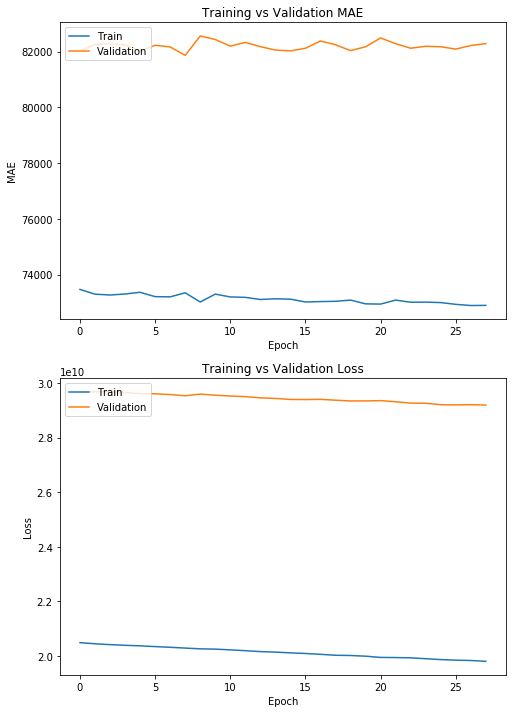

In [43]:
plot_hist(history1.history, xsize=8, ysize=12)